# Bitcoin and Market Indices Analysis

**Author:** EL YOUSFI Charaf 
**Date:** 08-19-2024

## Introduction

This notebook analyzes Bitcoin's historical performance and compares it to major stock indices:  
- Dow Jones Industrial Average (DJI)  
- Nasdaq Composite (IXIC)  
- S&P 500 (GSPC)

We will:

- Examine Bitcoin's long-term trends, including the 2019 lows (~$4k), the 2021 run-up (~$70k), the 2022 crash following FTX and Fed tightening, and the 2024 rally with improved macro conditions and Spot Bitcoin ETFs.
- Compare Bitcoin's returns and volatility to traditional market indices, which also experienced their own cycles.
  - The Dow passing 40,000 in 2024, reflecting broad market optimism.
  - Nasdaq's growth fueled by AI breakthroughs.
  - S&P 500 as a broad market benchmark.

This provides context on how Bitcoin performs versus traditional assets, shedding light on risk, reward, and market structure changes over time.


In [2]:
!pip install pandas requests matplotlib seaborn numpy yfinance

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use seaborn's theme instead of plt.style.use("seaborn")
sns.set_theme()

## Loading the Data

We'll load data for:
- Bitcoin: `data/raw/bitcoin_data.csv`
- Dow: `data/raw/dow_data.csv`
- Nasdaq: `data/raw/nasdaq_data.csv`
- S&P 500: `data/raw/sp500_data.csv`


In [10]:
# Paths
btc_path = os.path.join( "data", "raw", "bitcoin_data.csv")
dow_path = os.path.join( "data", "raw", "dow_data.csv")
nasdaq_path = os.path.join( "data", "raw", "nasdaq_data.csv")
sp500_path = os.path.join( "data", "raw", "sp500_data.csv")

df_btc = pd.read_csv(btc_path)
df_dow = pd.read_csv(dow_path)
df_nasdaq = pd.read_csv(nasdaq_path)
df_sp500 = pd.read_csv(sp500_path)

# Check columns
print("BTC columns:", df_btc.columns)
print("Dow columns:", df_dow.columns)
print("Nasdaq columns:", df_nasdaq.columns)
print("S&P 500 columns:", df_sp500.columns)



BTC columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Dow columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Nasdaq columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
S&P 500 columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


We should see a "Date" column in each dataset (as Yahoo Finance typically includes it).  
If confirmed, we can parse it now.


In [18]:
def set_date_index(df):
    # If "Date" in columns, use that
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    # Else if "Unnamed: 0" in columns, that likely holds the date
    elif 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        # If neither Date nor Unnamed: 0 is present,
        # print columns for debugging
        print("No Date or Unnamed: 0 column found. Columns:", df.columns)
        # You may need to manually inspect the CSV files or set index_col when reading.
    return df

df_btc = set_date_index(df_btc)
df_dow = set_date_index(df_dow)
df_nasdaq = set_date_index(df_nasdaq)
df_sp500 = set_date_index(df_sp500)

print("After setting index:")
print("BTC index:", df_btc.index.name)
print("Dow index:", df_dow.index.name)
print("Nasdaq index:", df_nasdaq.index.name)
print("S&P 500 index:", df_sp500.index.name)

No Date or Unnamed: 0 column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No Date or Unnamed: 0 column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No Date or Unnamed: 0 column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No Date or Unnamed: 0 column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
After setting index:
BTC index: None
Dow index: None
Nasdaq index: None
S&P 500 index: None


## Quick Data Checks


In [20]:
df_btc.fillna(method='ffill', inplace=True)
df_dow.fillna(method='ffill', inplace=True)
df_nasdaq.fillna(method='ffill', inplace=True)
df_sp500.fillna(method='ffill', inplace=True)

print("BTC data range:", df_btc.index.min(), "-", df_btc.index.max())

BTC data range: 0 - 3748


C:\Users\Charaf\AppData\Local\Temp\ipykernel_11540\1868015148.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_btc.fillna(method='ffill', inplace=True)
C:\Users\Charaf\AppData\Local\Temp\ipykernel_11540\1868015148.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dow.fillna(method='ffill', inplace=True)
C:\Users\Charaf\AppData\Local\Temp\ipykernel_11540\1868015148.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_nasdaq.fillna(method='ffill', inplace=True)
C:\Users\Charaf\AppData\Local\Temp\ipykernel_11540\1868015148.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='ffill', inplace=T

## Analysis

Focus on 'Close' prices:

In [21]:
for df in [df_btc, df_dow, df_nasdaq, df_sp500]:
    df['price_usd'] = df['Close']

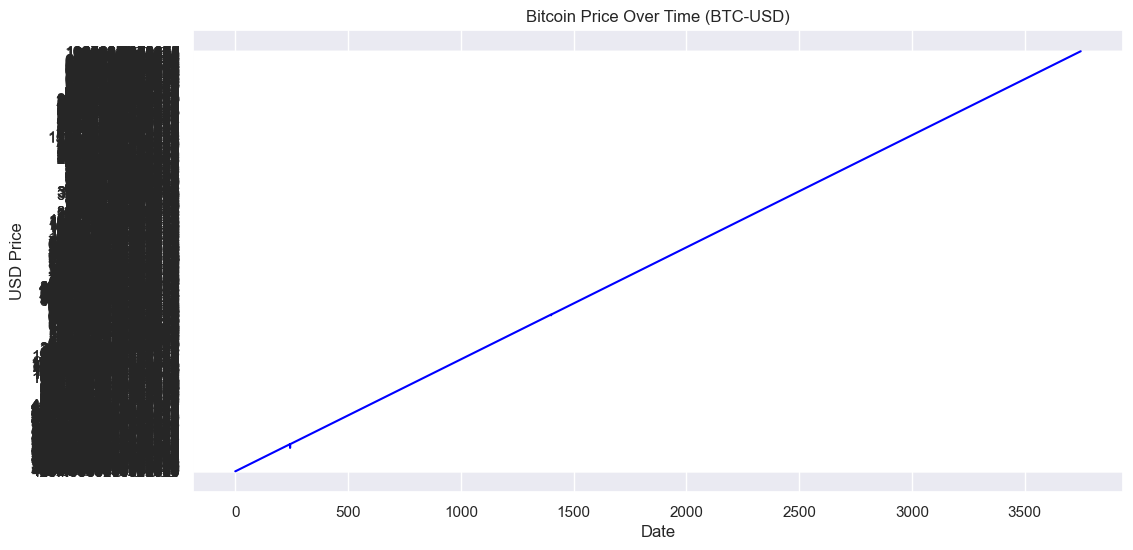

In [22]:
# Plot Bitcoin price
plt.plot(df_btc.index, df_btc['price_usd'], color='blue')
plt.title("Bitcoin Price Over Time (BTC-USD)")
plt.xlabel("Date")
plt.ylabel("USD Price")
plt.grid(True)
plt.show()

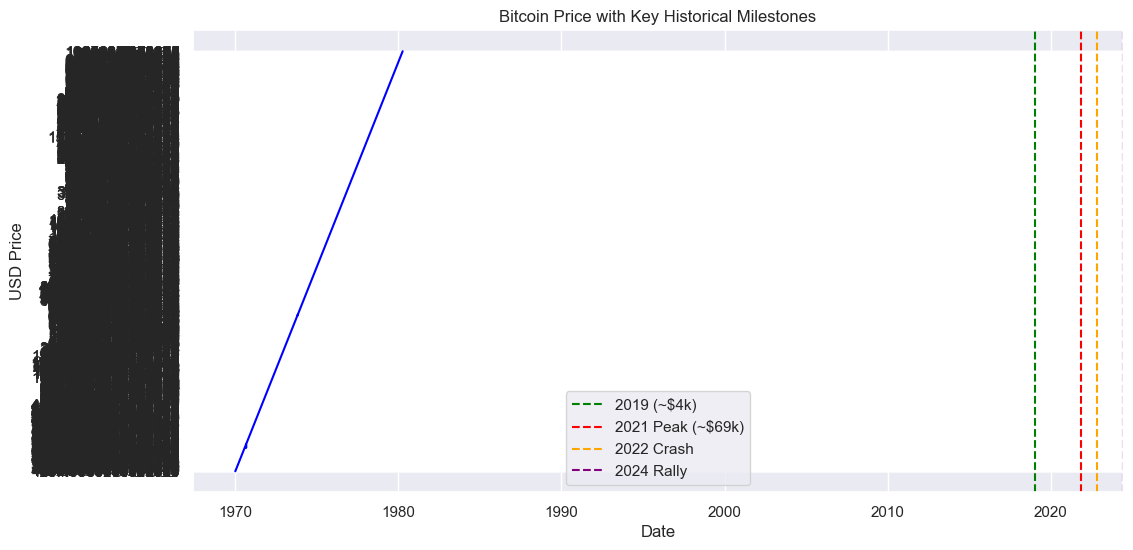

In [23]:
# Key events annotation
fig, ax = plt.subplots()
ax.plot(df_btc.index, df_btc['price_usd'], color='blue')
ax.axvline(pd.to_datetime("2019-01-01"), color='green', linestyle='--', label='2019 (~$4k)')
ax.axvline(pd.to_datetime("2021-11-01"), color='red', linestyle='--', label='2021 Peak (~$69k)')
ax.axvline(pd.to_datetime("2022-11-01"), color='orange', linestyle='--', label='2022 Crash')
ax.axvline(pd.to_datetime("2024-06-01"), color='purple', linestyle='--', label='2024 Rally')

ax.set_title("Bitcoin Price with Key Historical Milestones")
ax.set_xlabel("Date")
ax.set_ylabel("USD Price")
ax.legend()
ax.grid(True)
plt.show()

## Bitcoin Returns, Distribution, Cumulative Return, and Volatility


In [25]:
df_btc['daily_return'] = df_btc['price_usd'].pct_change()

plt.plot(df_btc.index, df_btc['daily_return'], color='red')
plt.title("Bitcoin Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

sns.histplot(df_btc['daily_return'].dropna(), kde=True, color='purple')
plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

df_btc['cumulative_return'] = (1 + df_btc['daily_return']).cumprod()
plt.plot(df_btc.index, df_btc['cumulative_return'], color='green')
plt.title("Cumulative Return of Bitcoin")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

df_btc['rolling_vol_30d'] = df_btc['daily_return'].rolling(30).std() * np.sqrt(30)
plt.plot(df_btc.index, df_btc['rolling_vol_30d'], color='orange')
plt.title("30-Day Rolling Volatility of Bitcoin")
plt.xlabel("Date")
plt.ylabel("Volatility (annualized approx.)")
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'